## Exercise 2 : Linear Regression through exact form

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To generate 3 sets of matrices with dimensions 100 * 2. 
Initializing them using normal distribution with mean 2 and standard deviations of 0.01,0.1 and 1 respectively.
Here we take one column of the matrix as the target vector Y. 
For bias, we add a column of 1s. The coefficient associated with this column will be beta0.
Hence X will have dimensions 100 * 2 and Y, 100 * 1.

In [2]:
#Initializing matrices with mean 2 and standard deviation 0.01,0.1 and 1.
A = np.random.normal(2,0.01,(100,2))
A_1 = np.random.normal(2,0.1,(100,2))
A_2 = np.random.normal(2,1,(100,2))

#Stacking a column of 1s to the above matrices
A = np.hstack((np.ones((100,1)),A))
A_1 = np.hstack((np.ones((100,1)),A_1))
A_2 = np.hstack((np.ones((100,1)),A_2))

#Creating target vector Y from the matrix A
Y = A[:,2:3]
Y_1 = A_1[:,2:3]
Y_2 = A_2[:,2:3]

# Removing Y from A
X = A[:,0:2]
X_1 = A_1[:,0:2]
X_2 = A_2[:,0:2]
print("Y vector shape-",Y.shape)


Y vector shape- (100, 1)


In [3]:
print("X vector shape-",X.shape)

X vector shape- (100, 2)


To implement the LEARN_SIMPLE_LINE_REG algorithm to find beta0 and beta1 using the matrix X. This algorithm finds the exact or closed form solution.
The closed form solution for linear regression is as follows: 
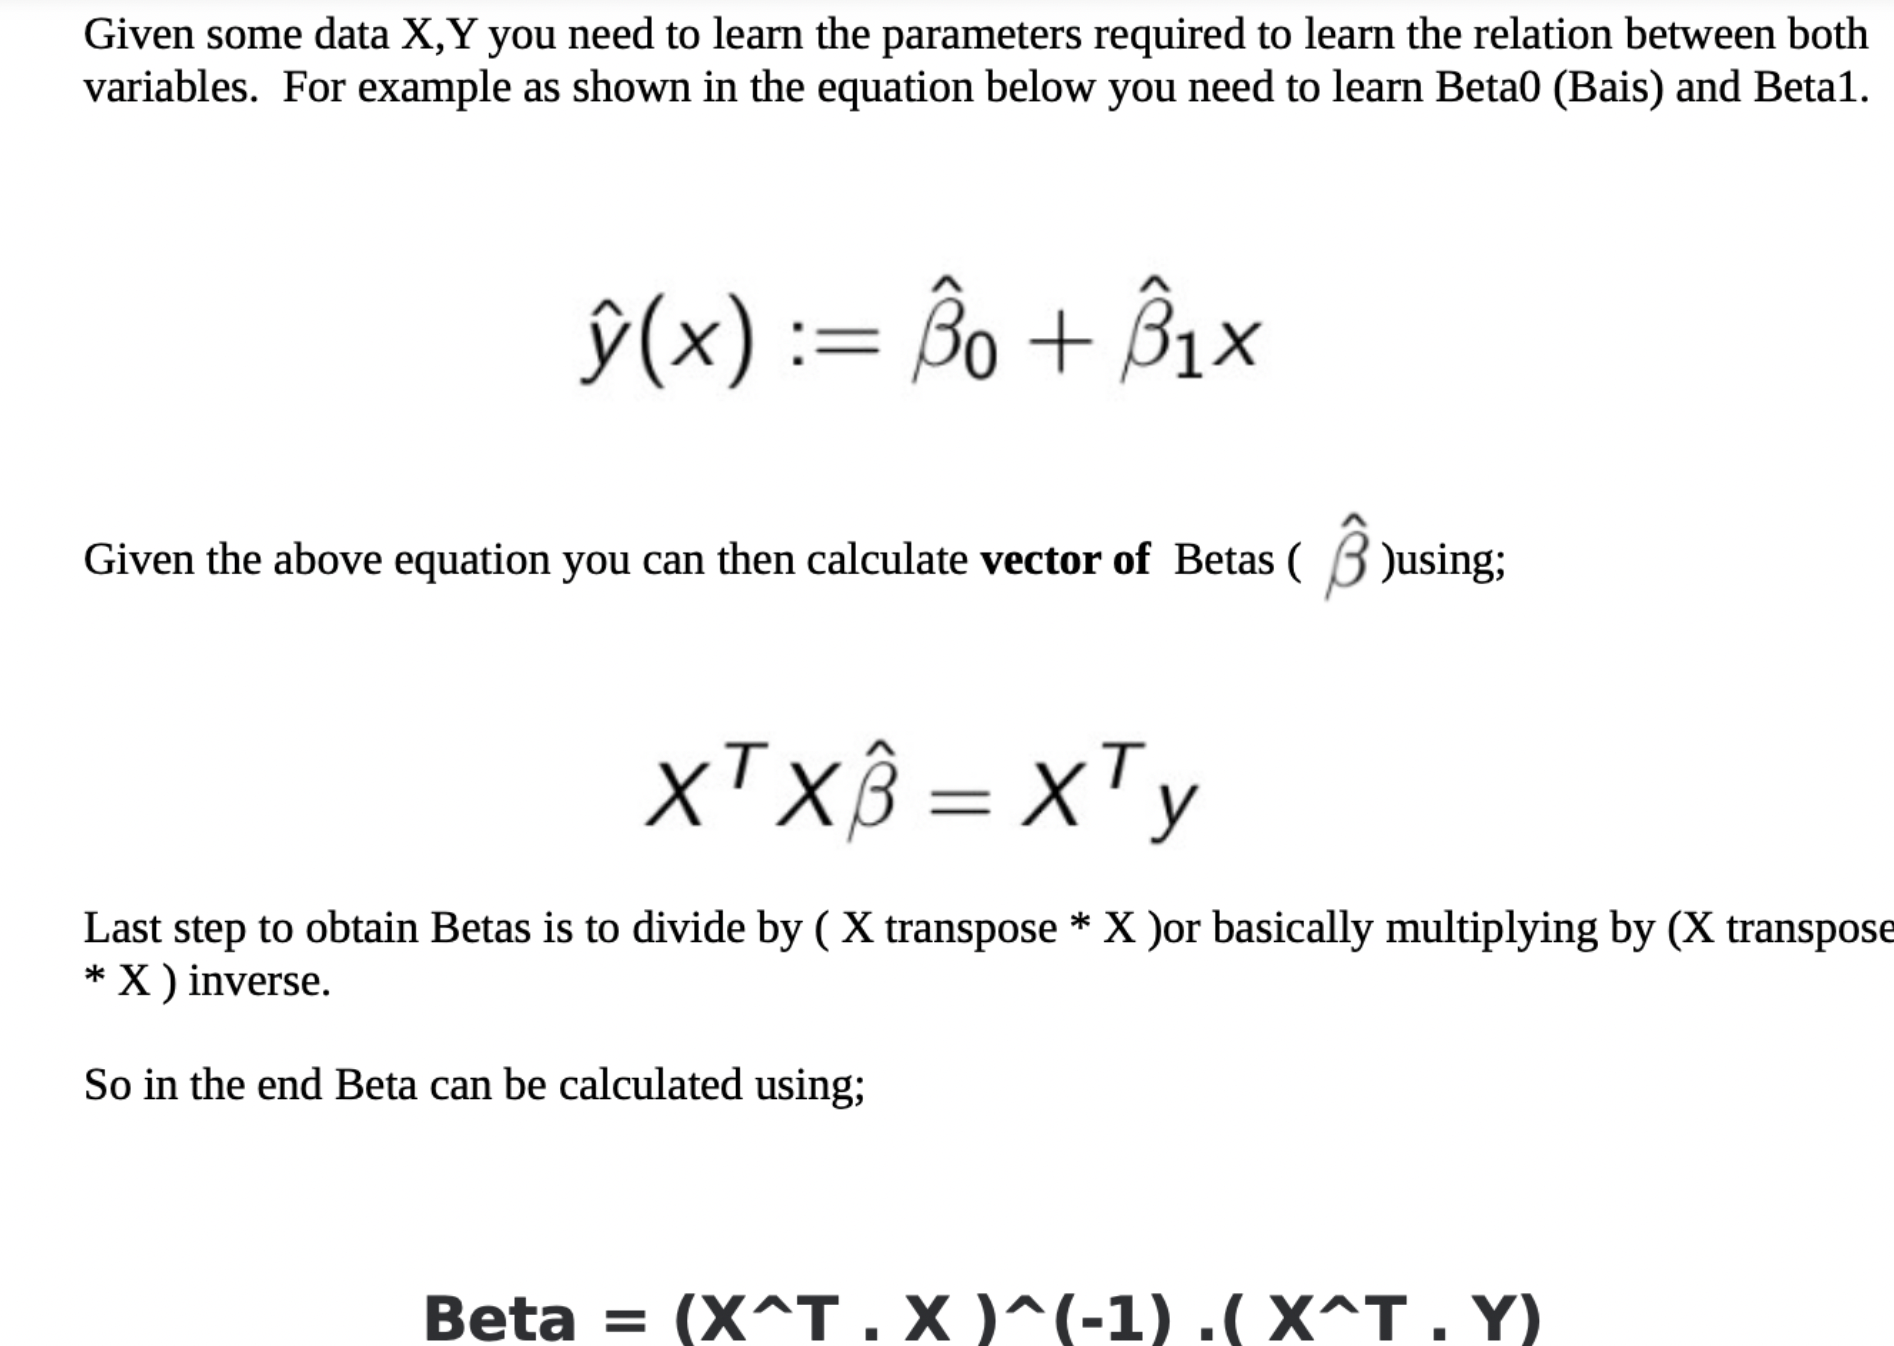

In matrix form: 
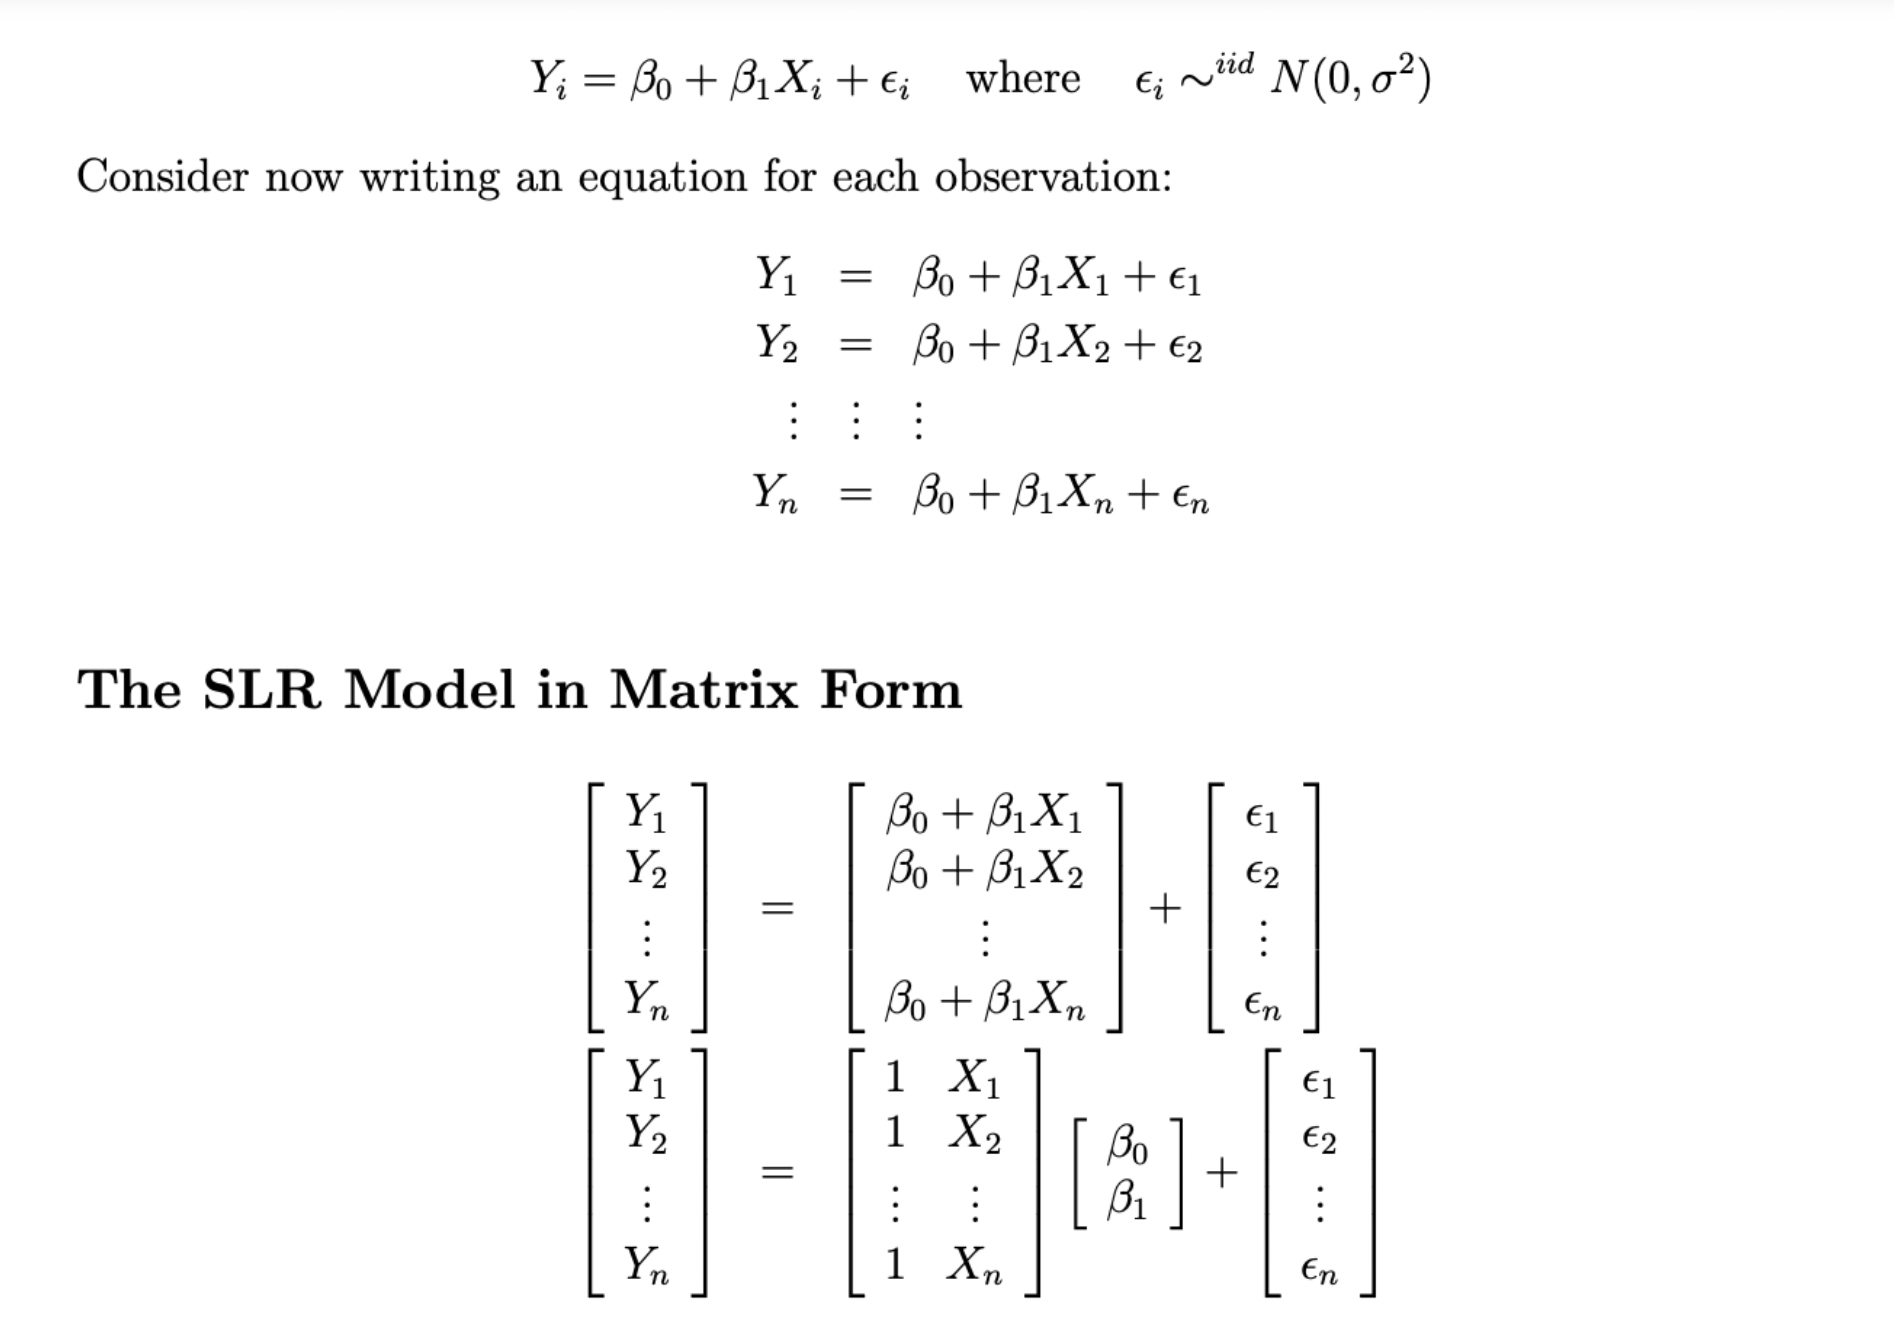

In [4]:
def linear_reg(X,Y):

    #Learn_Simple_line_Reg Algorithm to find beta coefficients using matrix inverse
    p1= np.linalg.inv(X.T.dot(X))
    p3=np.asarray(p1) #converting array to matrix form for doing dot operations

    p2=(X.T.dot(Y))

    
    
    # Beta = ((X.T.dot(X))*-1 ).(X.T.dot(Y)) from the hint given

    beta=p3.dot(p2)
    
    # Printing values for beta0 and beta1 coefficients
    print("\n Values of beta: ",beta)
    
    return beta

In [5]:
#Finding beta values for the 3 sets of inputs
beta = linear_reg(X,Y)
beta_set2 = linear_reg(X_1,Y_1)
beta_set3 = linear_reg(X_2,Y_2)


 Values of beta:  [[ 2.3230593 ]
 [-0.16240439]]

 Values of beta:  [[1.67683766]
 [0.16057291]]

 Values of beta:  [[ 2.10457109]
 [-0.02070834]]


Predicting the values of Y vector with the beta values found from above ie, substituting beta values in the eqn for linear regression

In [6]:

# Y_predicted = beta0 + X.beta1
#Predict_Simple_Line_Regression Algorithm for 3 sets of inputs

Y_predicted = np.matmul(X,beta) 
Y_predicted_set2 = np.matmul(X_1,beta_set2)
Y_predicted_set3 = np.matmul(X_2,beta_set3)

print("Predicted Y values shape-",Y_predicted.shape)

Predicted Y values shape- (100, 1)


In [7]:
def plot_graph(X,Y,Y_predicted):

    #Plotting the training values from vector Y and the predicted values Y_predicted as scatterplot
    #Considering only the column of X without 1s

    plt.scatter(X[:,1:2],Y, label="Traing Data")
    plt.scatter(X[:,1:2],Y_predicted,color="red", label="Predicted Data")
    plt.plot(X[:,1:2],Y_predicted, label="Linear Regression Line")
    plt.legend()
    plt.xlabel("$X$", fontsize=20)
    plt.ylabel("$Y$", rotation=0, fontsize=20)

    plt.show()

#We see that the blue dots represent the true values of Y and the red dots represent the predicted values

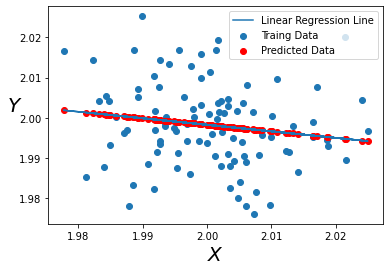

In [8]:
plot_graph(X,Y,Y_predicted) # Graph for first set

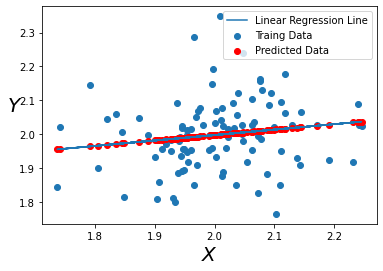

In [9]:
plot_graph(X_1,Y_1,Y_predicted_set2) #Graph for second set

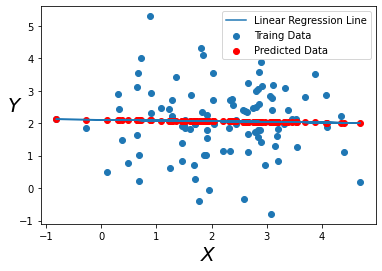

In [10]:
plot_graph(X_2,Y_2,Y_predicted_set3) #Graph for third set

Observation: We see that the predicted Y values form a straight line(Linear Regression). The slope of the line varies according to the input set. For std value change, the slope also changes.

To Put β0 to zero and rerun the program to generate the predicted line again for the three sets of inputs

In [11]:
def beta_change1(beta,X):
    beta_one = [0,beta[1][0]]                 #setting beta0 to 0
    Y_predicted=np.matmul(X,beta_one)         # Finding Y predicted for new betas
    return Y_predicted

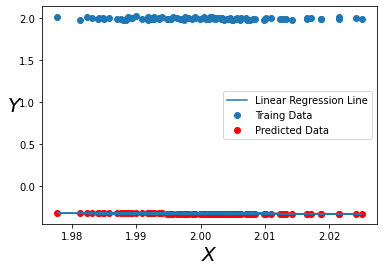

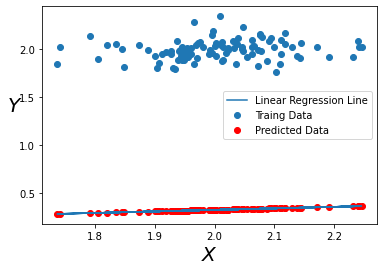

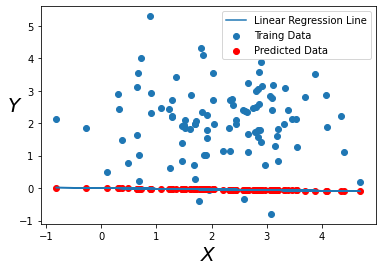

In [12]:
#Finding Y predicted values for the new sets of betas
Y_predicted = beta_change1(beta,X)
Y_predicted_set2 = beta_change1(beta_set2,X_1)
Y_predicted_set3 = beta_change1(beta_set3,X_2)

#Plotting the graphs for each set of inputs
plot_graph(X,Y,Y_predicted)
plot_graph(X_1,Y_1,Y_predicted_set2)
plot_graph(X_2,Y_2,Y_predicted_set3)

Observation: We observe that the predicted values are nearer to zero. And as the std changes, the slope of the regression line changes . The predicted values are also more further from each other.



To put β1 to zero and rerun the program to generate the predicted line

In [13]:
def beta_change2(beta,X):
    beta_two = [beta[0][0],0]                  #Setting beta 1 to zero
    Y_predicted=np.matmul(X,beta_two)          # The y predicted values will remain the same for all rows in X as
                                               #only col of 1s will be taken into consideration
    
    return Y_predicted

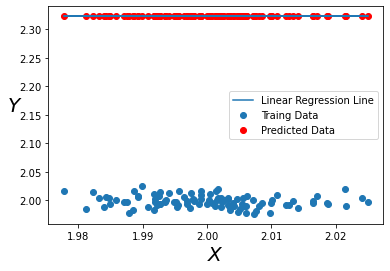

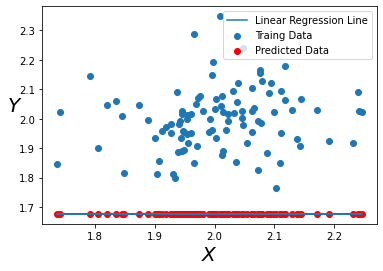

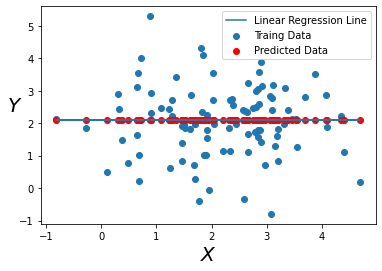

In [14]:
#Finding the Y predicted values for each input set for the new betas
Y_predicted = beta_change2(beta,X)
Y_predicted_set2 = beta_change2(beta_set2,X_1)
Y_predicted_set3 = beta_change2(beta_set3,X_2)



#Plotting the graphs for each set
plot_graph(X,Y,Y_predicted)
plot_graph(X_1,Y_1,Y_predicted_set2)
plot_graph(X_2,Y_2,Y_predicted_set3)

Observation: We can observe that the slope of the linear regression line remains zero in this case. Also as the std increases, the values are scattered more.

Also the y values are equal to beta0 value.

Using numpy.linalg lstsq to replace step 2 for learning values of β0 and β1. 

In [15]:
# Finding values of beta0 and beta1 using np.linalg.lstsq method also
beta0, beta1 = np.linalg.lstsq(X, Y, rcond=None)[0] # for first set of input
beta0, beta1

(array([2.3230593]), array([-0.16240439]))

In [16]:

beta0, beta1 = np.linalg.lstsq(X_1, Y_1, rcond=None)[0] # for second set of input
beta0, beta1

(array([1.67683766]), array([0.16057291]))

In [17]:
beta0, beta1 = np.linalg.lstsq(X_2, Y_2, rcond=None)[0] # for third set of input
beta0, beta1

(array([2.10457109]), array([-0.02070834]))

We observe that the beta values remain the same for both methods. Since we used Linear Regression through exact form, it gave the exact beta solutions i.e, the closed form solutions. Hence they are equivalent to the optimal beta values found through np.linalg.lstsq. But if we had used gradient descent method, the beta values would have differed.

# References
1 https://stackoverflow.com/questions/1550130/cloning-row-or-column-vectors
2 https://matplotlib.org/
3 https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
4 https://numpy.org
5 https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
6 https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf